In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import urllib
import os

### Read In Data

In [18]:
site = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'
urllib.urlretrieve(site,"rawdata.csv")
cmd = "mv rawdata.csv " + os.getenv("PUIDATA")

In [19]:
os.system(cmd)

0

In [11]:
!curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv
cmd = "mv rows.csv " + os.getenv("PUIDATA")
print(cmd)


curl: (35) SSL connect error
mv rows.csv /home/cusp/hh1827/PUIdata


In [12]:
os.system(cmd)

256

In [14]:
!wget https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv
cmd = "mv rows.csv " + os.getenv("PUIDATA")
print (cmd)

--2017-10-25 14:01:17--  https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv
Resolving data.cityofnewyork.us... 52.206.140.205
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: “rows.csv”

    [   <=>                                 ] 4,433,512   9.48M/s   in 0.4s    

Last-modified header invalid -- time-stamp ignored.
2017-10-25 14:01:17 (9.48 MB/s) - “rows.csv” saved [4433512]

mv rows.csv /home/cusp/hh1827/PUIdata


In [15]:
os.system(cmd)

0

### Merge Data

In [ ]:
zipincome.rename(columns={'index':'zipcodes'}, inplace=True)

In [27]:
df1 = pd.read_csv("data/H31.csv")
df2 = pd.read_csv("data/H33.csv")
df2

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22
5,1.773240,0.40


In [29]:
df2["x_m"] = df1["x3"]
df2.dropna(axis=0, how='any')

,y,x1,x_m
0,2.613388,-0.50,1.0
1,2.170351,-0.32,1.0
2,0.049546,-0.14,1.0
3,1.158258,0.04,1.0
4,1.397567,0.22,1.0


In [22]:
df1

,Unnamed: 0,y,x1,x2,x3
0,1,0,1,-2,1
1,2,2,-1,-1,1
2,3,2,0,0,1
3,4,3,-1,1,1
4,5,3,1,2,1


In [31]:
merged = pd.merge?

In [32]:
merged = pd.merge(df1, df2, how='inner', left_on="x3", right_on="x_m").dropna()
merged.head()

,Unnamed: 0,y_x,x1_x,x2,x3,y_y,x1_y,x_m
0,1,0,1,-2,1,2.613388,-0.50,1.0
1,1,0,1,-2,1,2.170351,-0.32,1.0
2,1,0,1,-2,1,0.049546,-0.14,1.0
3,1,0,1,-2,1,1.158258,0.04,1.0
4,1,0,1,-2,1,1.397567,0.22,1.0


In [45]:
df1.merge(df2, right_index=True, left_index=True)

,Unnamed: 0,y_x,x1_x,x2,x3,y_y,x1_y,x_m
0,1,0,1,-2,1,2.613388,-0.50,1.0
1,2,2,-1,-1,1,2.170351,-0.32,1.0
2,3,2,0,0,1,0.049546,-0.14,1.0
3,4,3,-1,1,1,1.158258,0.04,1.0
4,5,3,1,2,1,1.397567,0.22,1.0


In [35]:
cb = pd.concat([df1, df2])
cb

,Unnamed: 0,x1,x2,x3,x_m,y
0,1.0,1.00,-2.0,1.0,NaN,0.000000
1,2.0,-1.00,-1.0,1.0,NaN,2.000000
2,3.0,0.00,0.0,1.0,NaN,2.000000
3,4.0,-1.00,1.0,1.0,NaN,3.000000
4,5.0,1.00,2.0,1.0,NaN,3.000000
0,NaN,-0.50,NaN,NaN,1.0,2.613388
1,NaN,-0.32,NaN,NaN,1.0,2.170351
2,NaN,-0.14,NaN,NaN,1.0,0.049546
3,NaN,0.04,NaN,NaN,1.0,1.158258
4,NaN,0.22,NaN,NaN,1.0,1.397567


### Build Linear Model

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [90]:
data = pd.read_csv("data/IncomeInsReg.csv")
data.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
0,10001,77512.0,22767,20809,5800,16795,1958
1,10002,26905.0,79490,70361,40139,35167,9129
2,10003,79088.0,56909,53135,8593,48522,3774
3,10004,98020.0,3024,2780,180,2705,244
4,10005,99633.0,7566,6996,122,6944,570


In [43]:
# polyfit
polyfit_coeffs = np.polyfit(data["IncomePerCapita"], data["WithCoverage"], 1)

In [44]:
ols = smf.ols(formula='WithCoverage ~ IncomePerCapita',data=data).fit()

In [38]:
wls = smf.wls(formula='WithCoverage ~ IncomePerCapita',data=data,weights=weights**2).fit()

In [42]:
curvemodel = smf.ols(formula = 'WithCoverage ~ IncomePerCapita + I(IncomePerCapita**2)', data = data).fit()

### Plot& Remove Outlier and plot again

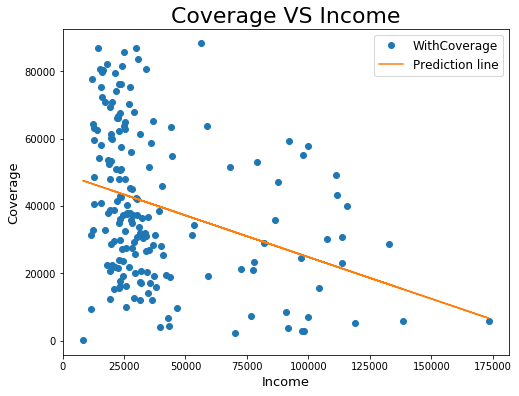

In [118]:
fig = pl.figure(figsize=(8,6))
pl.plot(data.IncomePerCapita, data.WithCoverage, 'o')
pl.plot(data.IncomePerCapita.dropna(), ols.predict(), label = 'Prediction line')
pl.title('Coverage VS Income', fontsize = 22)
pl.xlabel('Income', fontsize = 13)
pl.ylabel('Coverage', fontsize = 13)
pl.legend(loc='best', fontsize = 12)
pl.show()

### Statistical Tests

In [46]:
import scipy.stats

In [49]:
# ks test
ks = scipy.stats.ks_2samp(data["Public"], data["Private"])
print(ks)

Ks_2sampResult(statistic=0.26699029126213586, pvalue=5.7299942716898053e-07)


##### This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.The p value is way smaller than 5% level so we could reject the null hypothesis that there is no statistical difference in the private coverage and public coverage.

In [60]:
# Person's test
Pub = np.sort(np.random.choice(data["Public"],size=len(data)))
Pri = np.sort(np.random.choice(data["Private"],size=len(data)))
pearson = scipy.stats.pearsonr(Pub,Pri)
print(pearson)

(0.99176121276854834, 4.9023846769653267e-184)


##### The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson's correlation requires that each dataset be normally distributed, and not necessarily zero-mean. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Since the p value is smaller than 0.05, we can reject the null hypothesis that private and public datasets DONOT have linear relationship. 

In [63]:
# Spearman Test
spearman = scipy.stats.spearmanr(Pub,Pri)
print(spearman)

SpearmanrResult(correlation=0.99911065199605853, pvalue=1.7284202257917815e-282)


##### The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. Monotonicity is "less restrictive" than that of a linear relationship.The coefficient varies between -1 and +1 with 0 implying no correlation. Since the p value is smaller than 0.05, we can reject the null hypothesis that private and public datasets DONOT have monotonic relationship. 

In [66]:
# AD test
Pri_AD = scipy.stats.anderson(Pri, dist='norm')
print(Pri_AD)

AndersonResult(statistic=2.2356164242983994, critical_values=array([ 0.565,  0.644,  0.772,  0.901,  1.072]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [68]:
Pub_AD = scipy.stats.anderson(Pub, dist='norm')
print(Pub_AD)

AndersonResult(statistic=5.1589939550722477, critical_values=array([ 0.565,  0.644,  0.772,  0.901,  1.072]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


#####  null hypothesis that a sample is drawn from a population that follows a particular distribution.  at alpha = 0.05 the statistics = 5.158993955 is larger than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 is rejected. Public and Private are not following normal distribution. 

In [78]:
# Pearson's Chi Square Test
Pub = np.sort(np.random.choice(data["Public"],size=100))
Pri = np.sort(np.random.choice(data["Private"],size=100))
Chi_2 = scipy.stats.chisquare(Pub[14:], Pri[14:])
print(Chi_2)

Power_divergenceResult(statistic=218433.03085047213, pvalue=0.0)


##### The chi square test tests the null hypothesis that the categorical data has the given frequencies. In this case, the given frequency is the distribution featured by Pri, and tested data is Pub. Since the P value is less than 0.05, we can reject the null hypothesis that Pub follows the frequency of Pri distribution, ie., Pub and Pri do not follow the same distribution. 

In [83]:
# KL test 
KL = scipy.stats.entropy(Pub[14:], Pri[14:])
print(KL)

0.0537236945668


##### KL test is a measure of how one probability distribution diverges from a second, expected probability distribution.

In [124]:
print ("LR : ", -2 * (ols.llf - (curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(ols))

('LR : ', 2.0689209914980893)
('LR from statsmodels:', (2.0689209914980893, 0.15032784464091514, 1.0))


##### The P-value is larger than 0.05, we cannot reject the null hypothesis with statistical significance of 95%, i.e our 2nd degree polynomial is a better fit for the data

### Distributions